# Project 10: Customer Segmentation Based on Income and Spending

### 10.2 Importing Libraries

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns


### 10.3 Importing the Data Set

In [6]:
dataset = pd.read_csv('Data/Mall_Customers.csv')

In [7]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


This shows the first 5 rows of the data set with the 5 headings of CustomerID, Genre, Age, Annual Income, and Spending Score.

In [8]:
dataset.shape

(200, 5)

This shows the shape of the data set which is that the dataset contains 200 records and 5 columns.

### 10.4 Data Analysis

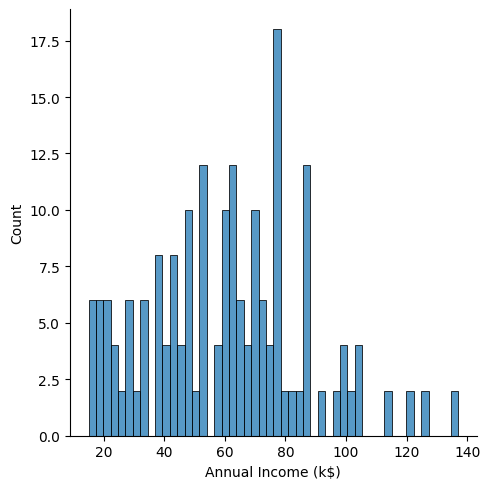

In [9]:
sns.displot(dataset['Annual Income (k$)'], kde = False, bins = 50)

This histogram aboves shows the Annual Income of the customers. The conclusion that can be drawn from this is that most customers have incomes between 60k and 90k a year.

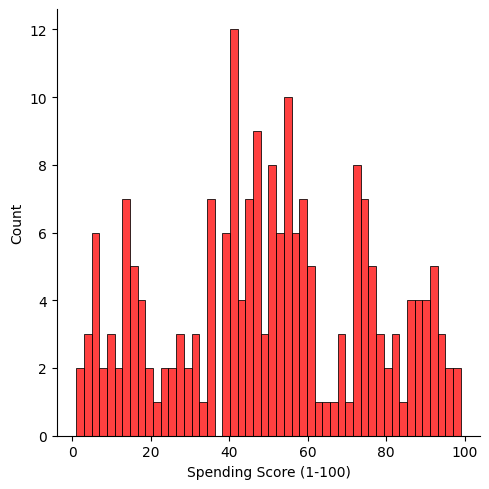

In [10]:
sns.displot(dataset['Spending Score (1-100)'], kde = False, bins = 50, color = "red")

The above histogram shows the a histogram of the Spending Score of the customers. The conclusion that can be drawn from this is that most customers have a spending score between 40 and 60.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

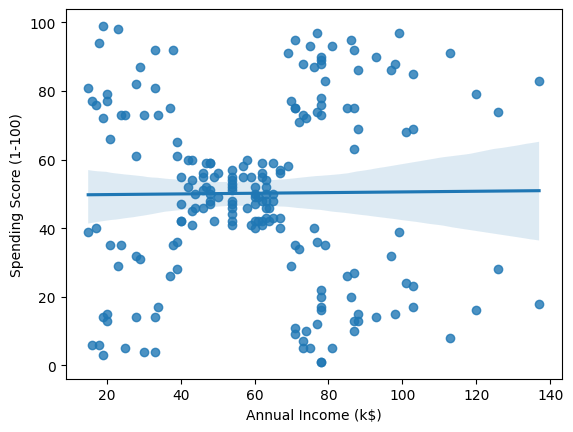

In [11]:
sns.regplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = dataset)

The above plot of regression shows the relation between the Annual Income and the Spending Score of the customers. The conclusion that can be drawn from this is that there is no correlation between the Annual Income and the Spending Score of the customers.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

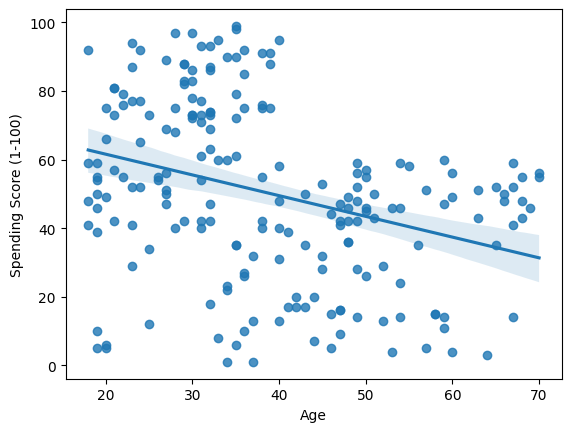

In [12]:
sns.regplot(x='Age', y = 'Spending Score (1-100)', data = dataset)

The above plot of regression shows the relation between the Age and the Spending Score of the customers. We can infer that from the plot that younger people have a tendency to spend more than older people.

### 10.5 K-Means Clustering

In [13]:
dataset = dataset.filter(["Annual Income (k$)", "Spending Score (1-100)"], axis = 1)
dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


The output here shows the only the annual incomes and the spending scores of the customers.

In [14]:
km_model = KMeans(n_clusters = 4)
km_model.fit(dataset)

C:\Users\carte\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

This performs the kmeans clustering using KMeans class. It sets the number of clusters to 4. It then fits the model to the data set and predicts the clusters for the data set.

In [15]:
print(km_model.cluster_centers_)

[[48.26       56.48      ]
 [87.         18.63157895]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


These are the four cluster center that are predicted by the kmeans clustering algorithm.

In [16]:
print(km_model.labels_)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


This shows the cluster labels which are numbers that serve as the cluster ids.

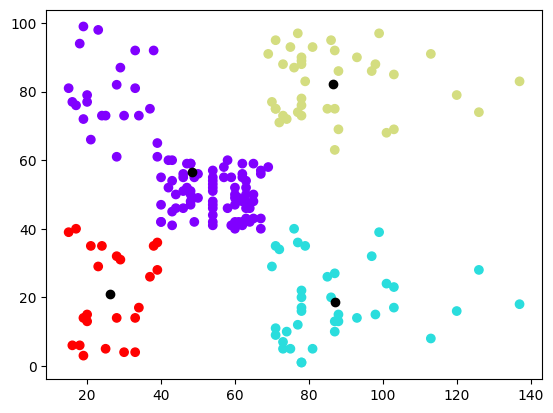

In [17]:
# pring the data points
plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c = km_model.labels_, cmap = 'rainbow')

# print the centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], color = 'black')

In this model all the black dots are the centroids of the clusters. All the colored dots around the centroids are the data points that belong to the cluster and are colored by what centroid they belong to.

### 10.6 Elbow Method for Finding K Value

C:\Users\carte\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\carte\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\carte\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\carte\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

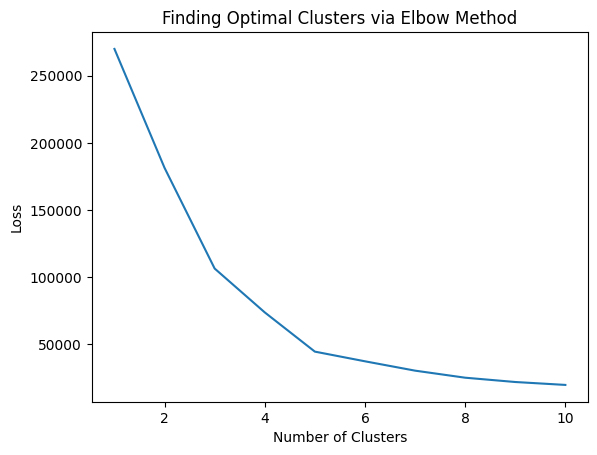

In [18]:
# training KMeans on K values from 1 to 10

loss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(dataset)
    loss.append(km.inertia_)


# printing loss against number of clusters

plt.plot(range(1, 11), loss)
plt.title('Finding Optimal Clusters via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.show()

This shows the distance between the clusters as more clusters are added. The conclusion that can be drawn from this is that the optimal number of clusters is 5 because the loss doesn't decrease much after 5 clusters.

In [19]:
# performing k means clustering using KMeans class
km_model = KMeans(n_clusters = 5)
km_model.fit(dataset)

C:\Users\carte\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

This sets the number of clusters to 5.

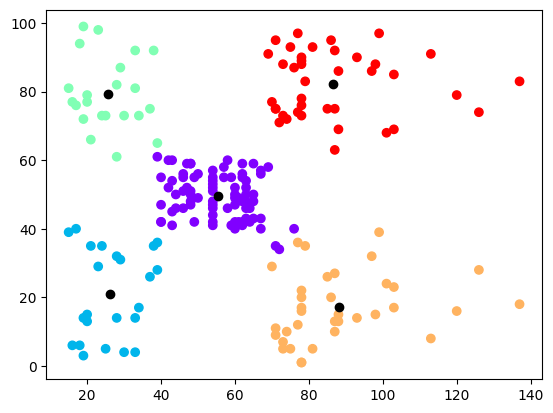

In [20]:
# pring the data points
plt.scatter(dataset.values[:,0], dataset.values[:,1], c = km_model.labels_, cmap = 'rainbow')


# print the centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], color = 'black')

The clusters are more even in a cluster size of 5 instead of the previous cluster size of 4.The cluster in the top right is the higher 
average income and higher average spending. This the group that should be targeted because they are more likely to spend more money in 
the future than the other groups. The group in the bottom left is the group with lower average incomes and lower average spending and 
should be targeted less because they are less likely to spend more money in the future.

### 10.7 Finding Customers to Target for Marketing

In [21]:
# printing the centroid values
print(km_model.cluster_centers_)

[[55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]]


This outputs the coodinates of the centroids of the clusters.

In [22]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dataset.index.values
cluster_map['cluster'] = km_model.labels_
cluster_map

,data_index,cluster
0,0,1
1,1,2
2,2,1
3,3,2
4,4,1
...,...,...
195,195,4
196,196,3
197,197,4
198,198,3


This is a dataframe of all the index values of all the records with their corresponding cluster labels.

In [23]:
cluster_map = cluster_map[cluster_map.cluster == 1]
cluster_map.head()

,data_index,cluster
0,0,1
2,2,1
4,4,1
6,6,1
8,8,1


This is a filtered dataframe of the first five customers of cluster 1. These are the customers with the high incomes and high spending.